[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mahmouddraz/xai/blob/main/notebooks/cam/cam_solution.ipynb)

# Clone the workshop Repo

In [1]:
!git clone https://github.com/mahmouddraz/xai.git

Cloning into 'xai'...
remote: Enumerating objects: 407, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 407 (delta 92), reused 98 (delta 46), pack-reused 251
Receiving objects: 100% (407/407), 106.14 MiB | 24.87 MiB/s, done.
Resolving deltas: 100% (218/218), done.
Checking out files: 100% (60/60), done.


# Imports 

In [3]:
import tensorflow as tf 
import tensorflow_datasets as tfds 
import cv2 
import matplotlib.pyplot as plt
import scipy as sp 
import numpy as np 

# Load model 


In [4]:
model = tf.keras.models.load_model('/content/xai/pretrained_models/cnn_model_cam.h5')

In [ ]:
model.summary()

## Create CAM model

In [6]:
cam_model = tf.keras.models.Model(inputs=model.input, outputs=(model.layers[-3].output, model.layers[-1].output))

# Take some images for testing

In [7]:
!wget -O cat1.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg


--2022-06-23 19:03:35--  https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156145 (152K) [image/jpeg]
Saving to: ‘cat1.jpg’

cat1.jpg            100%[===================>] 152.49K   936KB/s    in 0.2s    

2022-06-23 19:03:35 (936 KB/s) - ‘cat1.jpg’ saved [156145/156145]



## Prepare image and show resuts

In [8]:
def prepare_and_show_image(image): 
  # read image 
  image = cv2.imread(image)

  # resize image to to match the model input 
  image = cv2.resize(image, (300, 300))

  # normalize image 
  image = image /255
  
  # add one more axis 
  image_tensor = np.expand_dims(image, axis=0)

  #make a prediction
  features, res = cam_model.predict(image_tensor)
  
  #get the class_Activation features
  class_activation_features = sp.ndimage.zoom(features[0], (300/33, 300/33, 1), order=2)

  # get the class activation weights 
  class_activation_weights = model.layers[-1].get_weights()[0][:,0]

  # calculate the activation map 
  cam_output = np.dot(class_activation_features, class_activation_weights)
  
  # print and visualize 
  print("DOG" if round(res[0][0]) else "CAT")
  fig = plt.figure(figsize=(10,10))
  plt.imshow(cam_output, cmap='jet', alpha=0.6)
  plt.imshow(tf.squeeze(image_tensor), alpha=0.3)



CAT


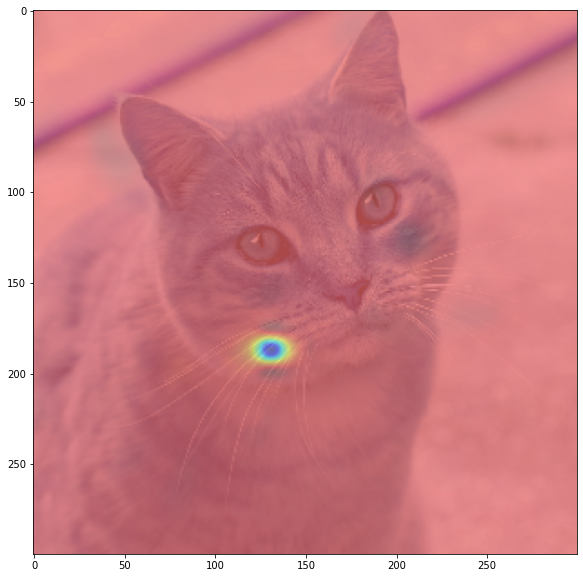

In [9]:
prepare_and_show_image('cat1.jpg')
